#Loan Status Prediction

### Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

##Data Preprocessing

In [ ]:
# load the csv to pandas df
loan_df = pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")

In [ ]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
loan_df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
loan_df["Loan_Status"].value_counts()

,count
Loan_Status,
Y,422
N,192


In [ ]:
categorical_features = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Credit_History", "Property_Area"]

for feature in categorical_features:
  print(loan_df[feature].value_counts())

Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Yes    398
No     213
Name: count, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


In [ ]:
loan_df.groupby("Gender")["Loan_Status"].value_counts()

Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              339
        N              150
Name: count, dtype: int64

In [ ]:
loan_df.groupby("Married")["Loan_Status"].value_counts()

Married  Loan_Status
No       Y              134
         N               79
Yes      Y              285
         N              113
Name: count, dtype: int64

In [ ]:
loan_df.groupby("Dependents")["Loan_Status"].value_counts()

Dependents  Loan_Status
0           Y              238
            N              107
1           Y               66
            N               36
2           Y               76
            N               25
3+          Y               33
            N               18
Name: count, dtype: int64

In [ ]:
loan_df.groupby("Self_Employed")["Loan_Status"].value_counts()

Self_Employed  Loan_Status
No             Y              343
               N              157
Yes            Y               56
               N               26
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Loan AMount')

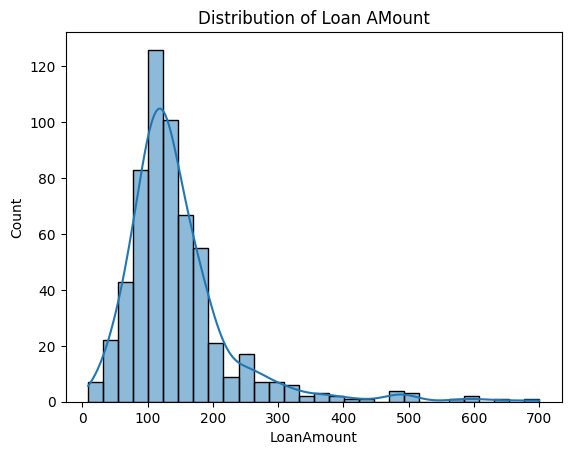

In [ ]:
sns.histplot(loan_df["LoanAmount"], kde=True, bins=30)
plt.title("Distribution of Loan AMount")

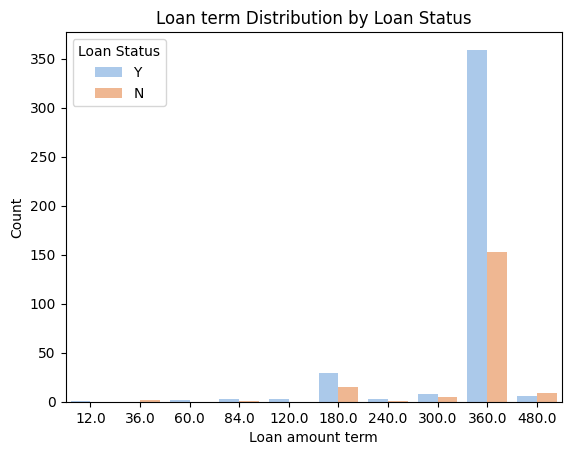

In [ ]:
sns.countplot(data=loan_df, x='Loan_Amount_Term', hue='Loan_Status', palette='pastel')
plt.title('Loan term Distribution by Loan Status')
plt.xlabel('Loan amount term')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [ ]:
loan_df.groupby("Credit_History")["Loan_Status"].value_counts()

Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             Y              378
                N               97
Name: count, dtype: int64

## Splitting the data

In [ ]:
label = LabelEncoder()
loan_df["Loan_Status"] = label.fit_transform(loan_df["Loan_Status"])

X = loan_df.drop(columns=["Loan_Status", "Loan_ID"], axis=1)
Y = loan_df["Loan_Status"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

train_data = X_train.copy()
train_data["Loan_Status"] = Y_train

In [ ]:
X_train.shape, X_test.shape, train_data.shape

((491, 11), (123, 11), (491, 12))

##Exploratory Data Analysis

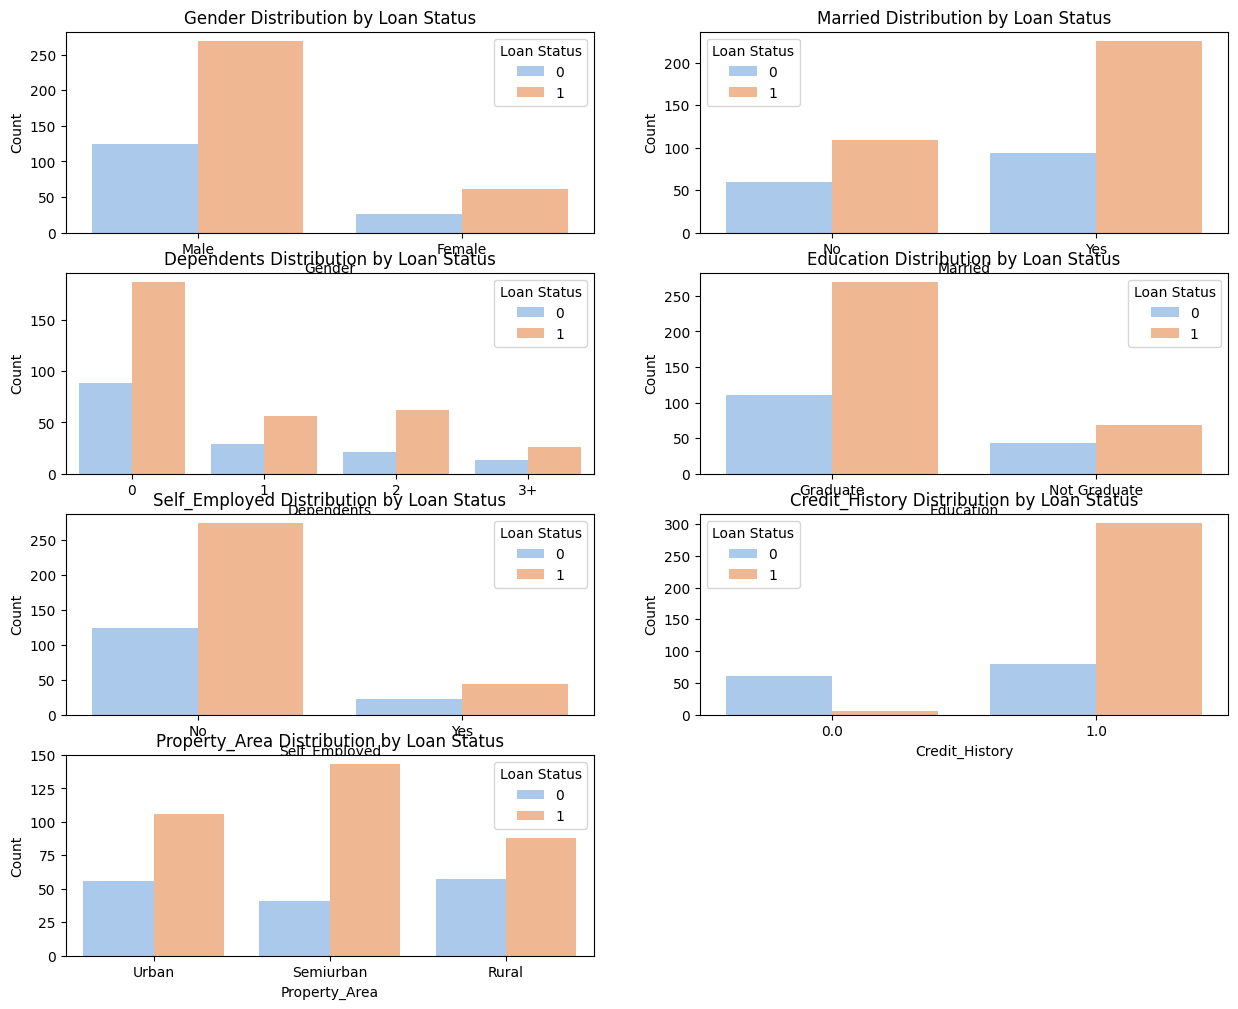

In [ ]:
# countplot for categorical features
plt.figure(figsize=(15, 12))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=train_data, x=col, hue='Loan_Status', palette='pastel')
    plt.title(f'{col} Distribution by Loan Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Loan Status')
plt.show()

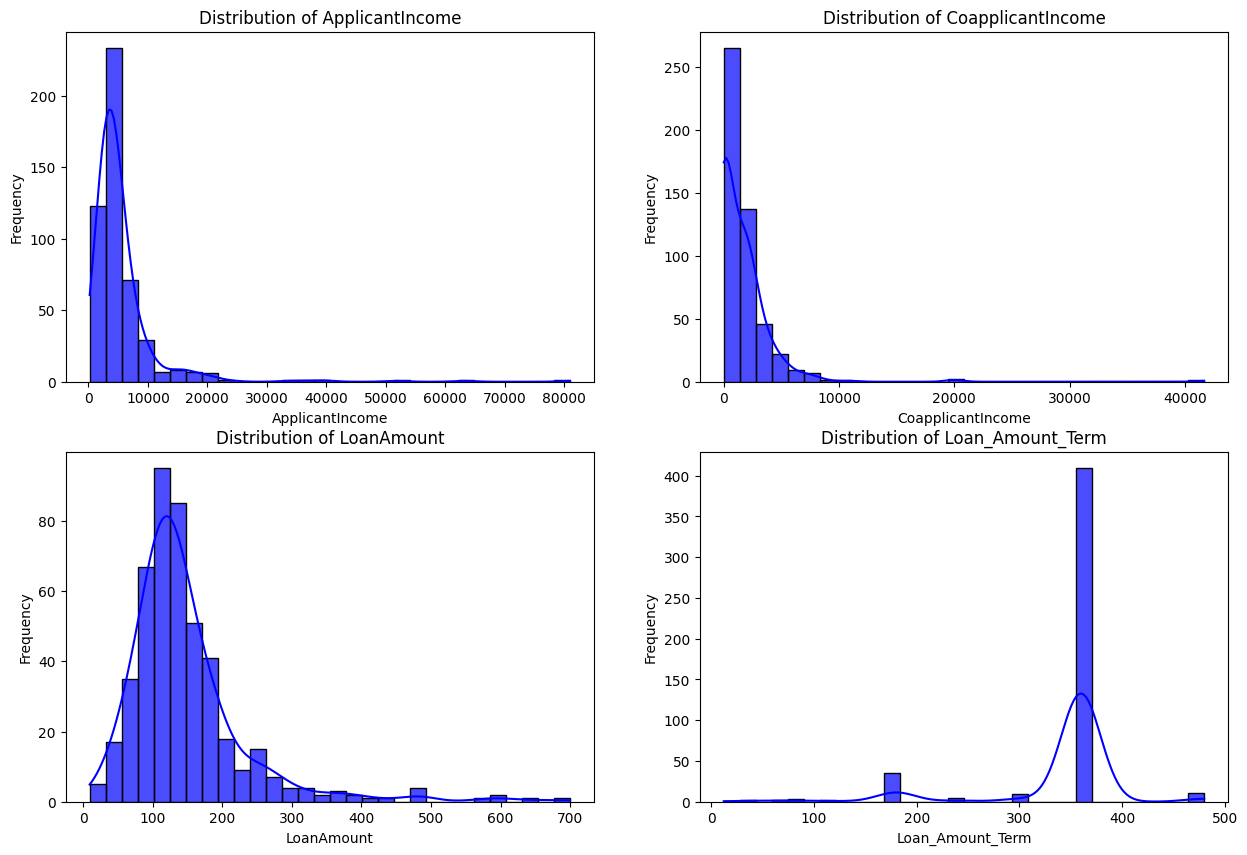

In [ ]:
# Distribution of numerical features
numerical_features = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
  plt.subplot(2, 2, i)
  sns.histplot(train_data[col], kde=True, bins=30, color="blue", alpha=0.7)
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")

# plt.tight_layout
plt.show()

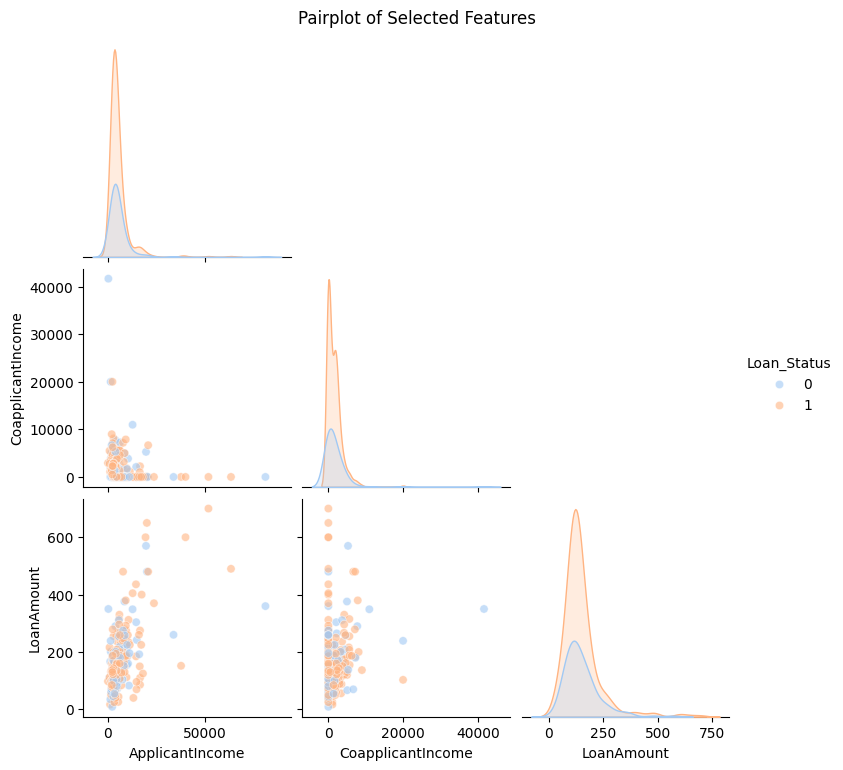

In [ ]:
# A pairplot of all the numerical features
numerical_features_plus_Loan = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Status"]
sns.pairplot(train_data[numerical_features_plus_Loan], diag_kind='kde', hue="Loan_Status", corner=True, palette="pastel", height=2.5, plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

##Model Training

Imputing, Scaling and Encoding the features

In [ ]:
binary_categorical_features = ["Gender", "Married", "Education", "Self_Employed", "Credit_History"]
multi_categorical_features = ["Dependents", "Property_Area"]
numerical_features = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]

# processor for binary categorical features
binary_categorical_processor = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
     ("label", OrdinalEncoder())
])

# processor for multi categorical features
multi_categorical_processor = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
     ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# processor for numerical features
numerical_processor = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
     ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_processor, numerical_features),
        ("bin_cat", binary_categorical_processor, binary_categorical_features),
        ("multi_cat", multi_categorical_processor, multi_categorical_features)
    ]
)

print(preprocessor)


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['ApplicantIncome', 'CoapplicantIncome',
                                  'LoanAmount', 'Loan_Amount_Term']),
                                ('bin_cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('label', OrdinalEncoder())]),
                                 ['Gender', 'Married', 'Education',
                                  'Self_Employed', 'Credit_History']),
                                ('multi_cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(st

Logistic Regression

In [ ]:
lr_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("lr", LogisticRegression(random_state=2))
])

lr_pipe.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('bin_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('label',
                                                                   OrdinalEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Credit_History']),
                                                 ('multi_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Dependents',
                                                   'Property_Area'])])),
                ('lr', LogisticRegression(random_state=2))])

In [ ]:
X_test_prediction = lr_pipe.predict(X_test)
accuracy = accuracy_score(X_test_prediction, Y_test)
report = classification_report(Y_test, X_test_prediction)
print(f"Accuracy score: {accuracy}")
print(report)

Accuracy score: 0.8617886178861789
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



SVM

In [ ]:
svm_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("svm", SVC(kernel="poly"))
])

svm_pipe.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('bin_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('label',
                                                                   OrdinalEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Credit_History']),
                                                 ('multi_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Dependents',
                                                   'Property_Area'])])),
                ('svm', SVC(kernel='poly'))])

In [ ]:
X_test_prediction = svm_pipe.predict(X_test)
accuracy = accuracy_score(X_test_prediction, Y_test)
report = classification_report(Y_test, X_test_prediction)
print(f"Accuracy score: {accuracy}")
print(report)

Accuracy score: 0.8455284552845529
              precision    recall  f1-score   support

           0       0.95      0.53      0.68        38
           1       0.82      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.76      0.79       123
weighted avg       0.86      0.85      0.83       123



Random forest

In [ ]:
rf_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("rf", RandomForestClassifier(random_state=42))
])

rf_pipe.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('bin_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('label',
                                                                   OrdinalEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Credit_History']),
                                                 ('multi_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Dependents',
                                                   'Property_Area'])])),
                ('rf', RandomForestClassifier(random_state=42))])

In [ ]:
X_test_prediction = rf_pipe.predict(X_test)
accuracy = accuracy_score(X_test_prediction, Y_test)
report = classification_report(Y_test, X_test_prediction)
print(f"Accuracy score: {accuracy}")
print(report)

Accuracy score: 0.8292682926829268
              precision    recall  f1-score   support

           0       0.77      0.63      0.70        38
           1       0.85      0.92      0.88        85

    accuracy                           0.83       123
   macro avg       0.81      0.77      0.79       123
weighted avg       0.83      0.83      0.82       123



XGB

In [ ]:
xgb_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("xgb", XGBClassifier(random_state=42))
])

xgb_pipe.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('bin_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('label',
                                                                   OrdinalEncoder())]),
                                                  ['Gende...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [ ]:
X_test_prediction = xgb_pipe.predict(X_test)
accuracy = accuracy_score(X_test_prediction, Y_test)
report = classification_report(Y_test, X_test_prediction)
print(f"Accuracy score: {accuracy}")
print(report)

Accuracy score: 0.8130081300813008
              precision    recall  f1-score   support

           0       0.73      0.63      0.68        38
           1       0.84      0.89      0.87        85

    accuracy                           0.81       123
   macro avg       0.79      0.76      0.77       123
weighted avg       0.81      0.81      0.81       123



Cross validation

In [ ]:
lr_cv = cross_val_score(lr_pipe, X_train, Y_train, cv=5)
print(f"Cross Validation score for Logistic Regression is {lr_cv.mean()}")
svm_cv = cross_val_score(svm_pipe, X_train, Y_train, cv=5)
print(f"Cross Validation score for SVM is {svm_cv.mean()}")
rf_cv = cross_val_score(rf_pipe, X_train, Y_train, cv=5)
print(f"Cross Validation score for Random Forest is {rf_cv.mean()}")
xgb_cv = cross_val_score(xgb_pipe, X_train, Y_train, cv=5)
print(f"Cross Validation score for XGB is {xgb_cv.mean()}")

Cross Validation score for Logistic Regression is 0.7983714698000413
Cross Validation score for SVM is 0.7698618841475984
Cross Validation score for Random Forest is 0.773984745413317
Cross Validation score for XGB is 0.7371882086167801
